<a href="https://colab.research.google.com/github/mystica2000/MachineLearning/blob/master/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
dataset = pd.read_csv('Position_Salaries.csv')
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [36]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [37]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [38]:
y=y.reshape(len(y),1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [0]:
#unique format 2d arr as ip standard scaler

## Feature Scaling

In [0]:
from sklearn.preprocessing import StandardScaler
sx=StandardScaler()
sy=StandardScaler()
#mean and sd of x will be in sx so create another for y
x=sx.fit_transform(x)
y=sy.fit_transform(y)

In [41]:
print(x)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [42]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result

In [43]:
sy.inverse_transform(regressor.predict(sx.transform([[6.5]])))

array([170370.0204065])

## Visualising the SVR results

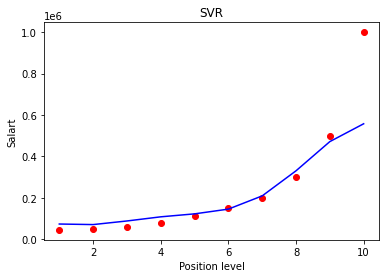

In [44]:
plt.scatter(sx.inverse_transform(x),sy.inverse_transform(y),color='red')
plt.plot(sx.inverse_transform(x),sy.inverse_transform(regressor.predict(x)),color='blue')
plt.ylabel('Salart')
plt.xlabel('Position level')
plt.title('SVR')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

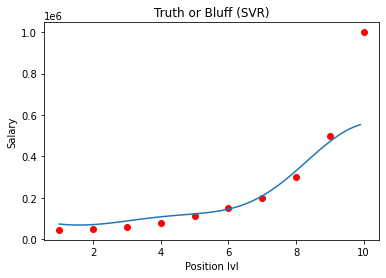

In [47]:
x_grid=np.arange(min(sx.inverse_transform(x)),max(sx.inverse_transform(x)),0.1)
x_grid=x_grid.reshape((len(x_grid),1))
plt.scatter(sx.inverse_transform(x),sy.inverse_transform(y),color='red')
plt.plot(x_grid,sy.inverse_transform(regressor.predict(sx.transform(x_grid))))
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position lvl')
plt.ylabel('Salary')
plt.show()